In [1]:
## Importing required Libraries
import pandas as pd
import numpy as np
import os

In [3]:
# Creating path for easier access:
path = r'C:\Users\Lenovo\Desktop\Career Foundry\28-06-2024 Instacart Basket Analysis - Saswata Biswas'

In [5]:
# Importing the latest department file:
dept_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'dept_new.pkl'))

In [7]:
dept_df.dtypes

department_id      int8
department       object
dtype: object

In [9]:
# Importing the latest orders file
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))


### Took almost 80 mins to download this data

In [11]:
ords_prods_cust_merge.dtypes

order_id                    int32
user_id                     int32
order_number                 int8
orders_days_of_week          int8
order_hour_of_day            int8
days_since_prior_order    float16
product_id                  int32
add_to_cart_order           int16
reordered                    int8
product_name               object
aisle_id                    int16
department_id                int8
prices                    float64
price_range_loc            object
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_order                    int8
loyalty_flag               object
average_spend             float64
spender_flag               object
customer_frequency        float16
frequency_flag             object
first_name                 object
surname                    object
gender                     object
state                      object
age                         int16
date_joined                object
n_dependants  

In [16]:
# Merging df_dept to ords_prods_cust_merge via department_id after closing all applications:
ords_prods_cust_dept_merge=ords_prods_cust_merge.merge(dept_df,on='department_id',indicator=True)


In [20]:
#Checking the shape:
ords_prods_cust_dept_merge.shape

(32404859, 39)

In [22]:
# Cheking the head
ords_prods_cust_dept_merge.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,n_dependants,marital_status,income,region,customer_activity_flag,age_group,income_group,dependants_flag,department,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,3,married,40423,South,High Activity,Middle-Age Adult,Low,Has Dependants,beverages,both
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,3,married,40423,South,High Activity,Middle-Age Adult,Low,Has Dependants,dairy eggs,both
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,...,3,married,40423,South,High Activity,Middle-Age Adult,Low,Has Dependants,snacks,both
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,...,3,married,40423,South,High Activity,Middle-Age Adult,Low,Has Dependants,snacks,both
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,3,married,40423,South,High Activity,Middle-Age Adult,Low,Has Dependants,household,both


In [24]:
# Exporting new dataframe
ords_prods_cust_dept_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust_dept_merge.pkl'))

In [26]:
#Checking counts of new merged column:
ords_prods_cust_dept_merge['department'].value_counts()

department
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

In [28]:
# Importing Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

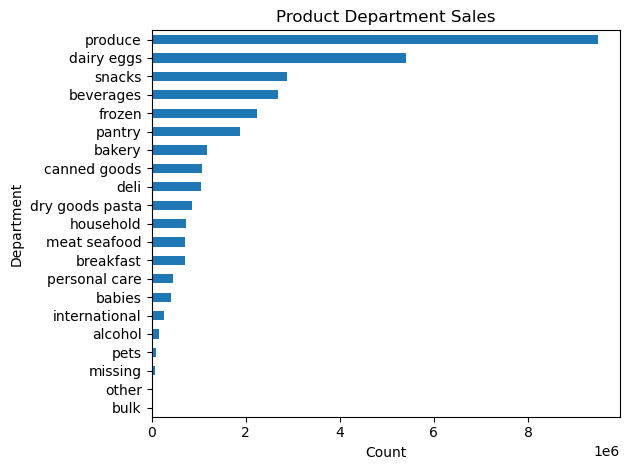

In [30]:
# Creating department bar chart (horizontal)
dept_bar=ords_prods_cust_dept_merge['department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()

#### Produce is the most sold department

In [33]:
# Exporting Department Bar Chart
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_product_bar.png'))

In [35]:
# Creating crosstab to compare age_group profile with departments
age_department_comparison=pd.crosstab(ords_prods_cust_dept_merge['age_group'],ords_prods_cust_dept_merge['department'],dropna=False)

<Figure size 2500x2500 with 0 Axes>

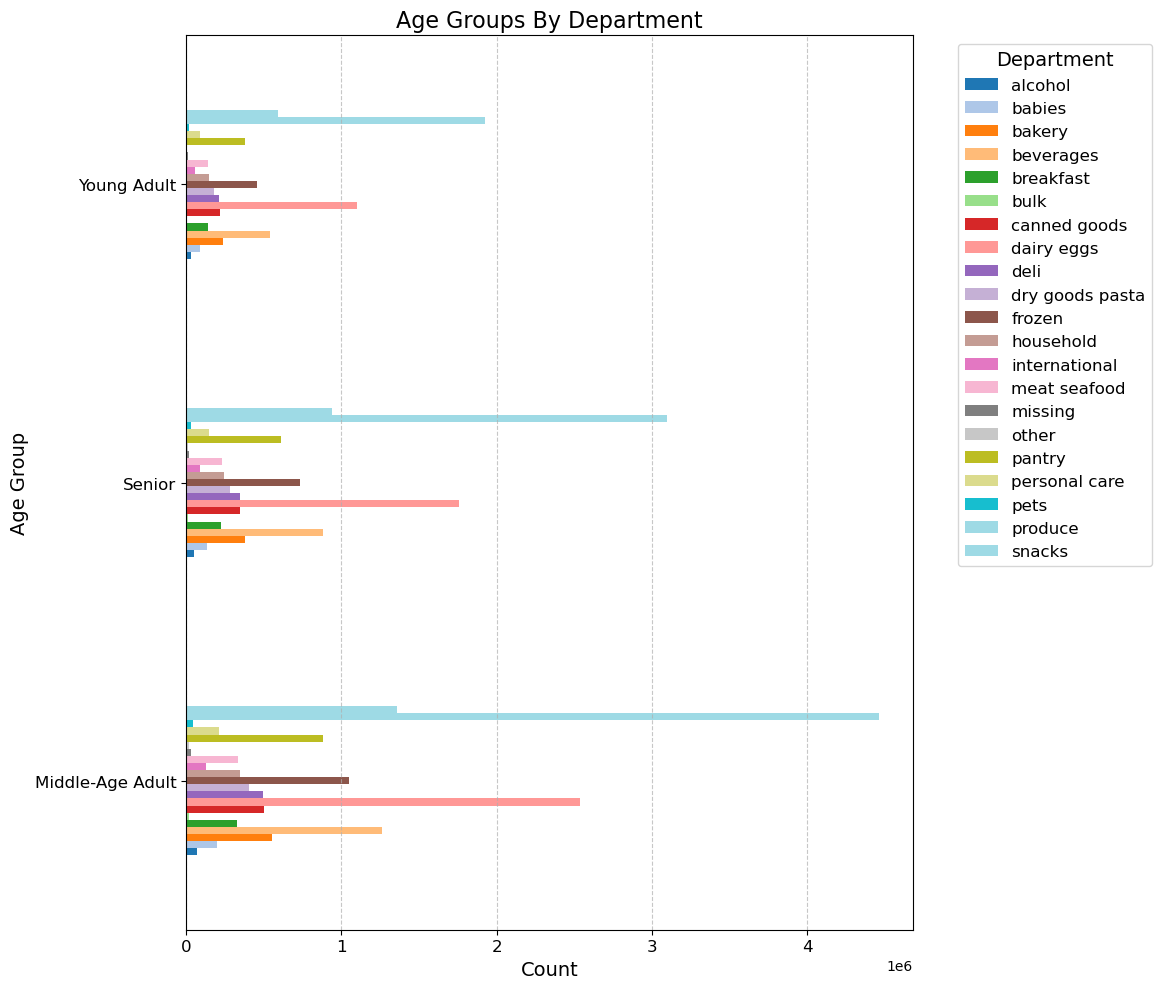

In [37]:
plt.figure(figsize=(25, 25))
age_department_comparison_bar = age_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Age Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [39]:
# Exporting Age Group by Department Bar Chart
age_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_department_comparison_bar.png'))

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [48]:
ords_prods_cust_dept_merge.columns.tolist()

['order_id',
 'user_id',
 'order_number',
 'orders_days_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'average_spend',
 'spender_flag',
 'customer_frequency',
 'frequency_flag',
 'first_name',
 'surname',
 'gender',
 'state',
 'age',
 'date_joined',
 'n_dependants',
 'marital_status',
 'income',
 'region',
 'customer_activity_flag',
 'age_group',
 'income_group',
 'dependants_flag',
 'department',
 '_merge']

In [50]:
### Step 01. Aggregate the max, mean, and min for order_number, prices, and days_since_prior_order by user_id.
agg_funcs = {
    'order_number': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min'],
    'days_since_prior_order': ['max', 'mean', 'min']
}

In [52]:
# Group by user_id and aggregate
agg_df = ords_prods_cust_dept_merge.groupby('user_id').agg(agg_funcs)

In [54]:
# Flatten the MultiIndex columns
agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
agg_df.reset_index(inplace=True)

In [62]:
# Display the aggregated data
agg_df.head()

,user_id,order_number_max,order_number_mean,order_number_min,prices_max,prices_mean,prices_min,days_since_prior_order_max,days_since_prior_order_mean,days_since_prior_order_min
0,1,10,5.813559,1,14.0,6.367797,1.0,30.0,18.542374,0.0
1,2,14,8.035897,1,14.8,7.515897,1.3,30.0,14.902564,0.0
2,3,12,6.000000,1,14.4,8.197727,1.3,21.0,10.181818,0.0
3,4,5,2.888889,1,14.6,8.205556,1.4,21.0,11.944445,0.0
4,5,4,2.486486,1,14.8,9.189189,3.2,19.0,10.189189,0.0


In [60]:
# Merge the aggregated data with the original DataFrame to get regional and departmental info
customer_profiles = ords_prods_cust_dept_merge[['user_id', 'region', 'department']].drop_duplicates()
agg_profiles = pd.merge(agg_df, customer_profiles, on='user_id', how='left')

## Q 08. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [64]:
# Analyze data by region
region_analysis = agg_profiles.groupby('region').agg({
    'order_number_max': ['mean', 'min', 'max'],
    'order_number_mean': ['mean', 'min', 'max'],
    'order_number_min': ['mean', 'min', 'max'],
    'prices_max': ['mean', 'min', 'max'],
    'prices_mean': ['mean', 'min', 'max'],
    'prices_min': ['mean', 'min', 'max'],
    'days_since_prior_order_max': ['mean', 'min', 'max'],
    'days_since_prior_order_mean': ['mean', 'min', 'max'],
    'days_since_prior_order_min': ['mean', 'min', 'max']
}).reset_index()

In [70]:
#  Display all the columns of a DataFrame

pd.options.display.max_columns = None

In [74]:
# Display regional analysis
region_analysis

region order_number_max         order_number_mean                       \
                         mean min max              mean       min        max   
0    Midwest        18.025039   2  99          9.589924  1.120000  59.539020   
1  Northeast        18.134967   2  99          9.635657  1.100000  62.426856   
2      South        18.130031   1  99          9.632132  1.000000  60.470937   
3       West        18.177205   3  99          9.658681  1.115385  64.576652   

  order_number_min          prices_max               prices_mean       \
              mean min max        mean  min      max        mean  min   
0         1.000044   1   2  344.064849  1.0  99999.0   12.894009  1.0   
1         1.000033   1   2  328.292170  1.1  99999.0   12.353913  1.1   
2         1.000034   1   4  338.601667  1.0  99999.0   13.328444  1.0   
3         1.000032   1   2  316.027132  1.0  99999.0   12.495375  1.0   

                prices_min            days_since_prior_order_max             \
            max       mean  min   max                       mean  min   max   
0  25005.425000   1.261351  1.0  23.2                  26.399635  0.0  30.0   
1   7414.485185   1.264840  1.0  14.9                  26.330681  0.0  30.0   
2  15006.940000   1.263502  1.0  15.0                  26.388340  0.0  30.0   
3  10209.987755   1.264886  1.0  19.4                  26.293310  0.0  30.0   

  days_since_prior_order_mean                 days_since_prior_order_min       \
                         mean  min        max                       mean  min   
0                   12.659944  0.0  29.500000                   0.000123  0.0   
1                   12.625485  0.0  29.425287                   0.000132  0.0   
2                   12.649056  0.0  29.702971                   0.000099  0.0   
3                   12.610791  0.0  29.423729                   0.000099  0.0   

         
    max  
0   8.0  
1   4.0  
2  10.0  
3   7.0

In [76]:
department_analysis = agg_profiles.groupby('department').agg({
    'order_number_max': ['mean', 'min', 'max'],
    'order_number_mean': ['mean', 'min', 'max'],
    'order_number_min': ['mean', 'min', 'max'],
    'prices_max': ['mean', 'min', 'max'],
    'prices_mean': ['mean', 'min', 'max'],
    'prices_min': ['mean', 'min', 'max'],
    'days_since_prior_order_max': ['mean', 'min', 'max'],
    'days_since_prior_order_mean': ['mean', 'min', 'max'],
    'days_since_prior_order_min': ['mean', 'min', 'max']
}).reset_index()

In [78]:
department_analysis

department order_number_max         order_number_mean            \
                                mean min max              mean       min   
0           alcohol        16.049943   3  99          8.569351  1.250000   
1            babies        23.872191   3  99         12.530810  1.166667   
2            bakery        18.076117   3  99          9.603343  1.100000   
3         beverages        16.979379   3  99          9.053844  1.100000   
4         breakfast        19.545823   3  99         10.350290  1.100000   
5              bulk        28.415972   3  99         14.813396  1.321429   
6      canned goods        18.041620   3  99          9.589446  1.100000   
7        dairy eggs        16.196782   1  99          8.659480  1.000000   
8              deli        18.379823   3  99          9.758041  1.120000   
9   dry goods pasta        18.381589   3  99          9.761433  1.120000   
10           frozen        17.156490   1  99          9.143492  1.000000   
11        household        19.210101   1  99         10.179601  1.000000   
12    international        21.662614   3  99         11.408717  1.115385   
13     meat seafood        18.474269   3  99          9.803925  1.100000   
14          missing        24.279054   3  99         12.903245  1.333333   
15            other        25.189818   3  99         13.197423  1.263158   
16           pantry        17.100892   2  99          9.115765  1.100000   
17    personal care        20.349093   3  99         10.750762  1.166667   
18             pets        20.333711   3  99         10.724991  1.187500   
19          produce        16.084176   1  99          8.603078  1.000000   
20           snacks        17.023976   3  99          9.078085  1.100000   

              order_number_min          prices_max               prices_mean  \
          max             mean min max        mean  min      max        mean   
0   64.576652         1.000000   1   1  927.235751  1.3  99999.0   21.308192   
1   64.576652         1.000030   1   2  360.017344  1.6  99999.0   11.669644   
2   64.576652         1.000036   1   2  344.757717  2.7  99999.0   13.102504   
3   64.576652         1.000058   1   4  309.368312  1.1  99999.0   12.815144   
4   64.576652         1.000035   1   2  375.640957  2.5  99999.0   13.320301   
5   60.470937         1.000000   1   1   94.567727  6.1  99999.0    8.583914   
6   64.576652         1.000030   1   2  326.258428  1.2  99999.0   12.699519   
7   64.576652         1.000037   1   2  293.495096  1.1  99999.0   12.987395   
8   64.576652         1.000030   1   2  310.600980  2.3  99999.0   12.056373   
9   64.576652         1.000024   1   2  328.093562  3.6  99999.0   12.345859   
10  64.576652         1.000043   1   2  308.934323  1.0  99999.0   12.663742   
11  64.576652         1.000036   1   2  411.946570  1.0  99999.0   14.272500   
12  64.576652         1.000026   1   2  357.798881  2.7  99999.0   12.144245   
13  64.576652         1.000009   1   2  350.703324  8.1  99999.0   13.157540   
14  64.576652         1.000036   1   2  319.622339  4.9  99999.0   11.316773   
15  64.576652         1.000056   1   2  543.122775  4.6  99999.0   14.186854   
16  64.576652         1.000029   1   2  308.204596  1.6  99999.0   12.731316   
17  64.576652         1.000043   1   2  382.287848  2.4  99999.0   13.630510   
18  59.843641         1.000000   1   1  615.296657  4.6  99999.0   16.406805   
19  64.576652         1.000041   1   2  279.914380  1.2  99999.0   12.313854   
20  64.576652         1.000046   1   2  300.189285  1.6  99999.0   12.442104   

                           prices_min            days_since_prior_order_max  \
         min           max       mean  min   max                       mean   
0   1.300000  14042.512281   1.351874  1.0  13.7                  26.460691   
1   1.425000   4768.028571   1.194936  1.0  13.7                  26.036526   
2   1.900000  15006.940000   1.247197  1.0  12.5                  26.403870   
3   1.100000  15006.9400

## Interpretation and Insights

1. Order Number (Frequency):

Max: The maximum number of orders is consistent across all regions, around 18 orders.
Mean: The average number of orders (order_number_mean) is also similar across regions, hovering around 9.6. This suggests that, on average, customers place about 9 to 10 orders regardless of the region.
Min: The minimum number of orders is consistently 1 across all regions.

2. Prices (Expenditure):

Max: The maximum price varies slightly, with the Midwest having the highest maximum price (344.065) and the West having the lowest (316.027). This suggests that the most expensive single items purchased vary by region.
Mean: The average spending per item (prices_mean) is also fairly consistent, around 12.5 to 13.3. The South has the highest average spending at 13.328.
Min: The minimum price is consistent at around 1.26, indicating a similar lower price range across all regions.

3. Days Since Prior Order (Frequency):

Max: The maximum days since the prior order are similar across regions, around 26 days.
Mean: The average days between orders (days_since_prior_order_mean) is also quite consistent, around 12.6. This suggests that customers across regions reorder after approximately the same amount of time.
Min: The minimum days since the prior order is consistently 0, indicating that some customers place orders on consecutive days in all regions.

4. Regional Differences

a. Midwest:

Slightly higher maximum price (344.065), indicating the presence of more high-value purchases.
The average spending is relatively high (12.894), but not the highest.
The average days between orders is similar to other regions, suggesting a consistent purchasing pattern.

b. Northeast:

Has the second highest average spending (12.354).
Maximum days since the prior order is similar to other regions.
Shows a similar pattern in order frequency and expenditure.

c. South:

The highest average spending per item (13.328).
Shows consistency in order frequency and expenditure patterns with other regions.
West:

The lowest maximum price (316.027) among the regions.
Consistent average spending (12.495) and days since prior order with other regions.

### It is to be noted that the prices have not been removed as there was no indication in the Project brief. Also, these are samples. Even if we remove them, the only difference that we will come across is the difference in the mean max price.


## Conclusion 
The data indicates that customer behavior in terms of order frequency and expenditure is remarkably consistent across regions, with only slight variations in maximum prices and average spending. This consistency suggests that the same marketing and sales strategies could be effective across different regions. However, the slight variations in maximum prices and average expenditures may warrant region-specific strategies for high-value items or promotions targeting higher spending customers.

To further validate these insights, it would be useful to conduct additional analysis on customer demographics, product preferences, and seasonal trends across regions. This could provide a more comprehensive understanding of regional differences and help tailor strategies more effectively.

## Q 09. Produce suitable charts to illustrate your results and export them in your project folder.

In [89]:
# Creating crosstab to compare age_group profile with region locations
age_region_comparison=pd.crosstab(ords_prods_cust_dept_merge['age_group'],ords_prods_cust_merge['region'],dropna=False)

In [91]:
age_region_comparison

region,Midwest,Northeast,South,West
age_group,,,,
Middle-Age Adult,3601775,2666903,5046936,3907047
Senior,2465259,1894192,3518088,2705300
Young Adult,1530291,1161641,2226861,1680566


<Figure size 1000x700 with 0 Axes>

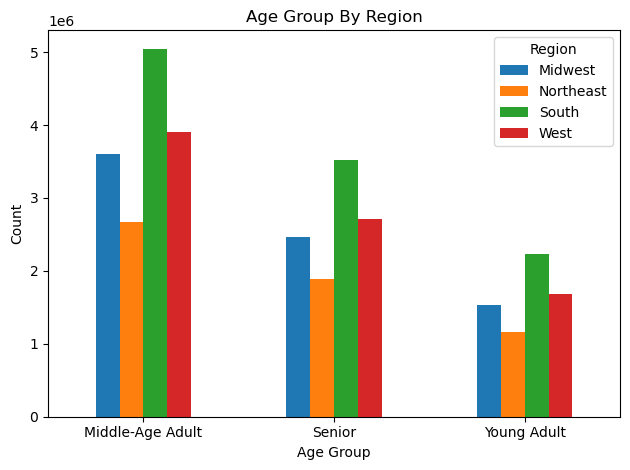

In [93]:
# Creating Bar Chart for Age Group By Region Comparison
plt.figure(figsize=(10, 7))
age_region_comparison_bar= age_region_comparison.plot(kind='bar',rot=0)
plt.title('Age Group By Region')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [95]:
# Exporting Age Group By Region Bar Chart
age_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_region_comparison_bar.png'))

In [106]:
#Checking columns to see which charts are useful:

ords_prods_cust_dept_merge.head()

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,region,customer_activity_flag,age_group,income_group,dependants_flag,department,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Middle-Age Adult,Low,Has Dependants,beverages,both
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Middle-Age Adult,Low,Has Dependants,dairy eggs,both
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Middle-Age Adult,Low,Has Dependants,snacks,both
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Middle-Age Adult,Low,Has Dependants,snacks,both
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low_spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Middle-Age Adult,Low,Has Dependants,household,both


In [108]:
# Creating Crosstab Bewtween age_group and loyalty_flag
age_group_loyalty_comparison=pd.crosstab(ords_prods_cust_merge['age_group'],ords_prods_cust_merge['loyalty_flag'],dropna=False)

<Figure size 1000x700 with 0 Axes>

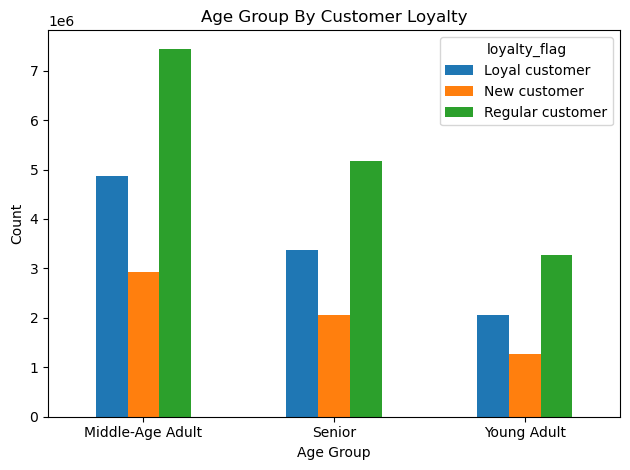

In [116]:
# Creating Bar Chart for age_group By customer loyalty
plt.figure(figsize=(10, 7))
age_group_loyalty_comparison_bar= age_group_loyalty_comparison.plot(kind='bar', rot=0)
plt.title('Age Group By Customer Loyalty')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [118]:
# Exporting age group by customer loyalty chart
age_group_loyalty_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_loaylty_comparison_bar.png'))

In [120]:
# Creating crosstab to compare region with customer frequency type
region_customer_frequency_comparison=pd.crosstab(ords_prods_cust_merge['region'],ords_prods_cust_merge['frequency_flag'])

<Figure size 1000x700 with 0 Axes>

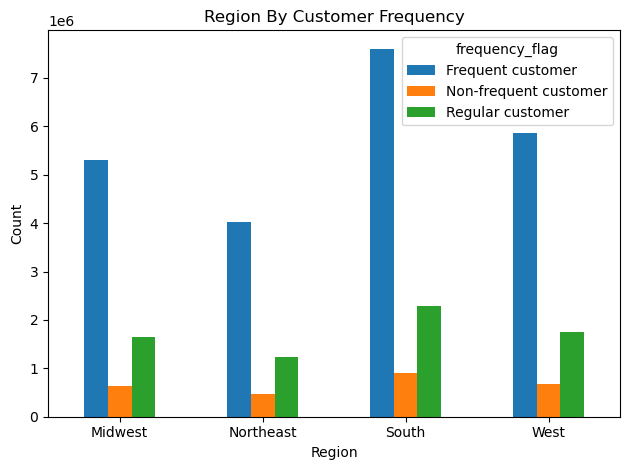

In [122]:
# Creating Bar Chart for region By customer frequency Comparison
plt.figure(figsize=(10, 7))
region_customer_frequency_comparison_bar= region_customer_frequency_comparison.plot(kind='bar', rot=0)
plt.title('Region By Customer Frequency')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [124]:
# Exporting Region by Customer Frequency Chart
region_customer_frequency_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_customer_frequency_comparison_bar.png'))

In [128]:
# Creating crosstab to compare region with customer marital_status
region_customer_marital_status_comparison=pd.crosstab(ords_prods_cust_merge['region'],ords_prods_cust_merge['marital_status'])

<Figure size 1000x700 with 0 Axes>

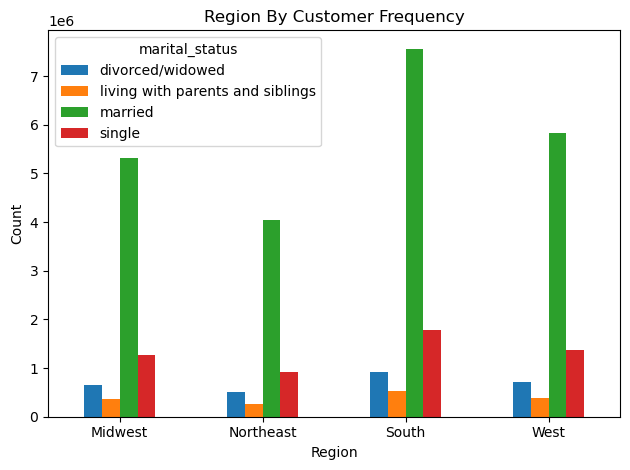

In [132]:
# Creating Bar Chart for region By customer marital status Comparison
plt.figure(figsize=(10, 7))
region_customer_marital_status_comparison= region_customer_marital_status_comparison.plot(kind='bar', rot=0)
plt.title('Region By Customer Frequency')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### This comes as a bit of surprise. I personally thought single people would be more than married people

In [139]:
# Exporting region By customer marital status Comparison
region_customer_marital_status_comparison.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_customer_marital_status_comparison_bar.png'))